### Name: Taneem Ullah Jan

## Task 01 (DSBA): Predicting Using Supervised Model

#### Problem:
    Predict the percentage of a student based on the number of studied hours.
#### Solution: 
    This is a simple regression problem so for this the Linear Regression is perfect, to predict the marks' percentage of a student based on the number of hours he/she studied.

### Steps to follow for solution: 
   - Reading and exploring the data
   - Visualizing the data
   - Preprocess the data for model
   - Modeling (Model Training)
   - Model Evaluation

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Step 01: Reading and Exploring the data

##### Reading the data

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

##### Exploring the data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Here we don't have any null values for any of the two features, confirming here below

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.shape

(25, 2)

## Step 02: Visualizing the data

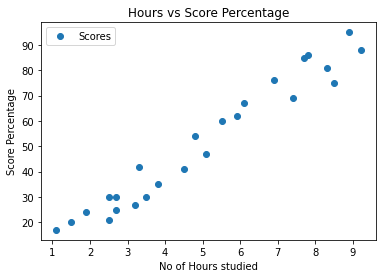

In [8]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score Percentage')
plt.xlabel('No of Hours studied')
plt.ylabel('Score Percentage')
plt.show()

From the graph above, it is clear that there is a positive relation between the Hours and the Scores

## Step 03: Preprocessing the data for model

Assign the feature variable Hours to X, and label, Scores to y. Also the feature and label should be in the form of numpy array

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [10]:
print("Type of X is: ", type(X), " and Type of y: ", type(y))

Type of X is:  <class 'numpy.ndarray'>  and Type of y:  <class 'numpy.ndarray'>


Splitting the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(20, 1)

In [13]:
y_train.shape

(20,)

In [14]:
X_test.shape

(5, 1)

In [15]:
y_test.shape

(5,)

## Step 04: Modeling

- Creating Linear Regression model with sklearn

In [16]:
model = LinearRegression()

- Training the our Linear Regression Model

In [17]:
model.fit(X=X_train, y=y_train)

LinearRegression()

- Visualizing our model, (Plotting the regression line)

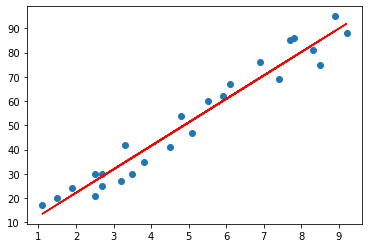

In [18]:
# The regression line
line = model.coef_*X+model.intercept_

# The test data
plt.scatter(X, y)
plt.plot(X, line, color='red');

plt.show()

- Prediction by model

In [19]:
prediction = model.predict(X_test)

In [20]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [21]:
prediction

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

## Step 05: Model Evaluation

- Comparing acutal and predicted results

In [22]:
df_comparison = pd.DataFrame({
    'Actual Result ' : y_test,
    'Predicted Result ': prediction
})

In [23]:
df_comparison

,Actual Result,Predicted Result
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


- Estimating the training and testing scores

In [24]:
# Training score
print("Training Score: ", model.score(X_train, y_train))

Training Score:  0.9491209376364416


In [25]:
# Testing score
print("Test Score: ", model.score(X_test, y_test))

Test Score:  0.9678055545167994


We've achived 96% of the testing accuracy for this model

- Plotting the Actual and Predicted Results

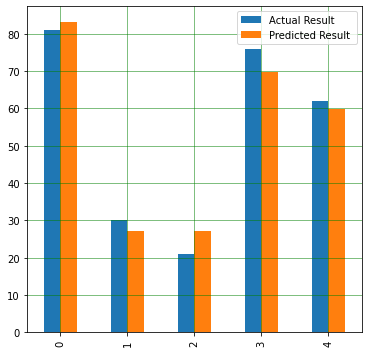

In [26]:
df_comparison.plot(kind='bar', figsize=(6, 6))
plt.grid(linewidth='0.5', color='blue')
plt.grid(linewidth='0.5', color='green')

- Testing with our own data

In [27]:
Hours = 9.25
test = np.array([Hours]).reshape(-1, 1)
predict = model.predict(test)

In [28]:
print("Number of Hours = {}".format(Hours))
print("Prediction Score = {}".format(predict[0]))

Number of Hours = 9.25
Prediction Score = 92.38611528261494


- Calculate the different errors to compare the model performance and predict accurac

In [29]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, prediction))

Mean Absolute Error:  3.9207511902099244


In [30]:
print("Mean Squared Error: ", mean_squared_error(y_test, prediction))

Mean Squared Error:  18.943211722315272


In [31]:
print("R2 Score: ", r2_score(y_test, prediction))

R2 Score:  0.9678055545167994


## Thank You

To watch till this point ;-)

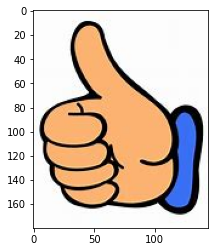

In [32]:
import matplotlib.image as mpimg

image = "thumbs_up.jpg"
image = mpimg.imread(image)
image_plot = plt.imshow(image)